In [1]:

se_f  = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/anno_multiplex/gff_A2_black/SE.rds"
cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top/"


umap_labels_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/results/chip_b1_lineage_markers.txt"
#umap_labels_f = ""

to_rename=FALSE
clone_order_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"
top_clones = -1
conditions = "Input,Flt3l"

In [2]:
#library("Nebulosa")
library("Seurat")
library(RColorBrewer)
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘RColorBrewer’ was built under R version 4.1.3”
Warning message:
“package ‘magrittr’ was built under R version 4.1.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘future’ was built under R version 4.1.3”


In [3]:
shape_vals = c(16,1,15,0) #map for the shapes for the conditions in the umap
conditions_l = unlist(strsplit(conditions, ",",),)
conditions_l

shape_vals = shape_vals[1:(length(conditions_l))]
shape.map <- cbind(conditions_l, shape_vals)
shape.map

[1] "Input" "Flt3l"

conditions_l,shape_vals
Input,16
Flt3l,1


In [4]:
clone_order <- as.data.frame(readr::read_csv(clone_order_f,col_names=F))$X1
clone_order

if(top_clones==-1){
    top.clones <- clone_order
}else{
    top.clones <- clone_order[1:top_clones]
}
top.clones

Rows: 26 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "1_0"  "1_1"  "1_2"  "1_3"  "1_4"  "1_6"  "1_7"  "1_8"  "1_9"  "1_10"
[11] "1_11" "1_13" "1_12" "1_14" "1_15" "1_16" "1_17" "1_18" "1_20" "1_22"
[21] "1_24" "1_25" "1_21" "1_23" "1_5"  "1_19"

[1] "1_0"  "1_1"  "1_2"  "1_3"  "1_4"  "1_6"  "1_7"  "1_8"  "1_9"  "1_10"
[11] "1_11" "1_13" "1_12" "1_14" "1_15" "1_16" "1_17" "1_18" "1_20" "1_22"
[21] "1_24" "1_25" "1_21" "1_23" "1_5"  "1_19"

In [5]:
cells_meta <- as.data.frame(readr::read_tsv(cells_meta_f),) # %>% tidyr::unite(barcode)

curr.cols <- colnames(cells_meta) 
curr.cols[[1]] = "cell"
curr.cols
colnames(cells_meta)  <- curr.cols
row.names(cells_meta) <- cells_meta$cell
cells_meta

New names:
• `` -> `...1`
Rows: 2622 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): ...1, cloneID, clusterID, condition
dbl (1): donor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "cell"      "cloneID"   "clusterID" "condition" "donor"

,cell,cloneID,clusterID,condition,donor
,<chr>,<chr>,<chr>,<chr>,<dbl>
Flt3l_AAACTCGGTAGGTCTT-1,Flt3l_AAACTCGGTAGGTCTT-1,1_16,Erythrocyte,Flt3l,1
Flt3l_AACATCGGTAGCGTTT-1,Flt3l_AACATCGGTAGCGTTT-1,1_7,Neutrophil,Flt3l,1
Flt3l_AACGGGATCCTTTGCG-1,Flt3l_AACGGGATCCTTTGCG-1,1_2,Granulocyte,Flt3l,1
Flt3l_AACGTACCAAGAAACT-1,Flt3l_AACGTACCAAGAAACT-1,1_11,Classical Monocyte,Flt3l,1
Flt3l_ACAGGCCGTATCGCGC-1,Flt3l_ACAGGCCGTATCGCGC-1,1_12,Neutrophil,Flt3l,1
Flt3l_ACGTTAGCAGCCACGT-1,Flt3l_ACGTTAGCAGCCACGT-1,1_6,Erythrocyte,Flt3l,1
Flt3l_ACTAACGCAATGGTCT-1,Flt3l_ACTAACGCAATGGTCT-1,1_13,Erythrocyte,Flt3l,1
Flt3l_ACTACCCTCCATCTAT-1,Flt3l_ACTACCCTCCATCTAT-1,1_11,Neutrophil,Flt3l,1
Flt3l_ACTATTCCATATACGC-1,Flt3l_ACTATTCCATATACGC-1,1_12,Neutrophil,Flt3l,1


## Need to change the cell IDs to have condition as prefix

In [6]:
se <- readRDS(se_f)
se$ID <- apply(stringr::str_split((rownames(se[[]])), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[[2]],  "_", x[[1]])})
if(to_rename){
se <- RenameCells(se, new.names=se$ID)
}
coord = max(max(Embeddings(se[["umap"]])), abs(min(Embeddings(se[["umap"]]))))
coord
se[[]]



[1] 7.945776

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,nCount_RNA,nFeature_RNA,ID,Row.names,index,raw.ID,new.index,condition,donor,donor_index
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<chr>,<I<chr>>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<dbl>
Flt3l_AAACGAAAGGAGACTC-1,Flt3l,531,531,2286,298,7,7,124,749,1101,⋯,649,621,AAACGAAAGGAGACTC-1_Flt3l,Flt3l_AAACGAAAGGAGACTC-1,0,AAACGAAAGGAGACTC-1,1,Flt3l,1,1
Flt3l_AAACGAAAGTCACGCC-1,Flt3l,1222,1222,4711,555,16,12,289,853,2986,⋯,1674,1502,AAACGAAAGTCACGCC-1_Flt3l,Flt3l_AAACGAAAGTCACGCC-1,1,AAACGAAAGTCACGCC-1,2,Flt3l,1,2
Flt3l_AAACGAACAAGACTAA-1,Flt3l,2225,2225,9178,1509,37,19,585,1339,5689,⋯,3369,2695,AAACGAACAAGACTAA-1_Flt3l,Flt3l_AAACGAACAAGACTAA-1,2,AAACGAACAAGACTAA-1,3,Flt3l,1,3
Flt3l_AAACGAACAAGCGAAC-1,Flt3l,2271,2271,8825,1544,24,24,535,1308,5390,⋯,3360,2784,AAACGAACAAGCGAAC-1_Flt3l,Flt3l_AAACGAACAAGCGAAC-1,3,AAACGAACAAGCGAAC-1,4,Flt3l,0,1
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,⋯,3722,2998,AAACGAACACAGCCAC-1_Flt3l,Flt3l_AAACGAACACAGCCAC-1,4,AAACGAACACAGCCAC-1,5,Flt3l,0,2
Flt3l_AAACGAACACAGGTAG-1,Flt3l,615,615,2384,240,13,7,149,594,1381,⋯,901,865,AAACGAACACAGGTAG-1_Flt3l,Flt3l_AAACGAACACAGGTAG-1,5,AAACGAACACAGGTAG-1,6,Flt3l,0,3
Flt3l_AAACGAACACAGTAGG-1,Flt3l,2545,2545,10019,1869,31,28,514,1008,6569,⋯,3950,3101,AAACGAACACAGTAGG-1_Flt3l,Flt3l_AAACGAACACAGTAGG-1,6,AAACGAACACAGTAGG-1,7,Flt3l,1,4
Flt3l_AAACGAACATAGAATG-1,Flt3l,985,985,3395,433,8,20,163,985,1786,⋯,1090,1005,AAACGAACATAGAATG-1_Flt3l,Flt3l_AAACGAACATAGAATG-1,7,AAACGAACATAGAATG-1,8,Flt3l,0,4
Flt3l_AAACGAACATGTAGAA-1,Flt3l,1020,1020,5086,708,5,21,243,1777,2332,⋯,1347,1237,AAACGAACATGTAGAA-1_Flt3l,Flt3l_AAACGAACATGTAGAA-1,8,AAACGAACATGTAGAA-1,9,Flt3l,1,5


In [7]:
#se[[]][!duplicated(se[[]][ , c("seurat_clusters", "clusterID")]), ][c("seurat_clusters", "clusterID")]

## Filter for top clones

In [8]:
se <- AddMetaData(se, cells_meta)
se

An object of class Seurat 
212927 features across 13593 samples within 2 assays 
Active assay: RNA (19039 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [9]:
umap_labels <- read.csv(umap_labels_f, header = F)

In [10]:
# Get color palette
# #colorRampPalette
# nb.cols <- 18
# mycolors <- 
# mycolors
f <- function(a,b){
    return(a=b)}

if((umap_labels_f=="NULL") | (umap_labels_f=="")){
    palette1 <- colorRampPalette(brewer.pal(8, "Set2"))(length(unique(se$clusterID))) #rainbow(length(unique(se$clusterID)))
    colors <- mapply(f, unique(se$clusterID),palette1)
}else {
    print('labels')
    umap.labels <- read.csv(umap_labels_f, header = F)
    row.names(umap.labels) <- umap.labels$V1
    palette1 <- colorRampPalette(brewer.pal(8, "Set2"))(dim(umap.labels)[1])  #rainbow(dim(umap.labels)[1])
    colors <- mapply(f, unique(umap.labels$V2), palette1)
}

palette1
colors
##c('#F68282','#31C53F','#1FA195','#B95FBB','#D4D915','#28CECA','#ff9a36','#2FF18B','#aeadb3','#faf4cf','#CCB1F1','#25aff5','#A4DFF2','#4B4BF7','#AC8F14','#E6C122') )

[1] "labels"


[1] "#66C2A5" "#C5A07A" "#DD927E" "#979EC1" "#BE93C6" "#DB98AE" "#B1C968"
 [8] "#CED843" "#FCD738" "#ECC978" "#D2BD9F" "#B3B3B3"

HSPC 1             Neutrophil                 HSPC 2 
             "#66C2A5"              "#C5A07A"              "#DD927E" 
           Erythrocyte     Classical Monocyte            Granulocyte 
             "#979EC1"              "#BE93C6"              "#DB98AE" 
                HSPC 3                    MkP                 HSPC 4 
             "#B1C968"              "#CED843"              "#FCD738" 
Non-classical monocyte            pre-B cells                    pDC 
             "#ECC978"              "#D2BD9F"              "#B3B3B3"

In [11]:
cloneID <- (unique(se$cloneID))
#cloneID <- (unique(se$cloneID))
cloneID <- cloneID[! cloneID=="None"]
cloneID <- cloneID[! cloneID=="None"]
cloneID <- na.omit(cloneID)
cloneID

cond <- (unique(cells_meta$condition))
cond <- cond[! cond=="None"]
cond

donors <- levels(as.factor(cells_meta$donor))
donors <-  donors[donors != "None"]
donors

[1] "1_16" "1_7"  "1_2"  "1_11" "1_12" "1_6"  "1_13" "1_3"  "1_8"  "1_0" 
[11] "1_4"  "1_24" "1_22" "1_15" "1_9"  "1_20" "1_10" "1_14" "1_1"  "1_18"
[21] "1_17" "1_25" "1_23" "1_5"  "1_19" "1_21"
attr(,"na.action")
[1] 1
attr(,"class")
[1] "omit"

[1] "Flt3l" "Input"

[1] "1"

In [12]:
se <- subset(x = se, subset = (cloneID != "None") & (donor != "None") & (condition != "None"))
top.se <- subset(x = se, subset = cloneID %in% top.clones)
top.se$cloneID <- factor(x = top.se$cloneID, levels =top.clones)


In [13]:

# my_cols <- c('3'='#F68282','15'='#31C53F','5'='#1FA195','1'='#B95FBB','13'='#D4D915',
#   '14'='#28CECA','9'='#ff9a36','8'='#2FF18B','11'='#aeadb3','6'='#faf4cf',
#   '2'='#CCB1F1','12'='#25aff5','7'='#A4DFF2','4'='#4B4BF7','16'='#AC8F14',
#   '10'='#E6C122')

# my_cols2 <- my_cols[order(as.integer(names(my_cols)))]
# scales::show_col(my_cols2)

In [14]:
#se$nuclear_cluster

In [15]:

# my_cols <- c('3'='#F68282','15'='#31C53F','5'='#1FA195','1'='#B95FBB','13'='#D4D915',
#   '14'='#28CECA','9'='#ff9a36','8'='#2FF18B','11'='#aeadb3','6'='#faf4cf',
#   '2'='#CCB1F1','12'='#25aff5','7'='#A4DFF2','4'='#4B4BF7','16'='#AC8F14',
#   '10'='#E6C122')

# my_cols2 <- my_cols[order(as.integer(names(my_cols)))]
# scales::show_col(my_cols2)


# DimPlot(my_seurat,
#         cols = my_cols2, label=TRUE , repel=TRUE)

In [16]:

d <- DimPlot(object = top.se, label = FALSE, split.by="cloneID", order = top.clones, ncol=1, 
             combine=T, cols=colors,
             group.by=c("clusterID"), shape.by=c("condition"), pt.size=6) +
    xlim(-1*coord-0.01,coord+0.01) +
    ylim(-1*coord-0.01,coord+0.01) + 
    theme(text = element_text(size = 4*top_clones)) +
    theme(axis.text = element_text(size = (top_clones))) +  
    scale_shape_manual(values = c("Input" = 16, "Flt3l" = 1)) + 
    scale_alpha_manual( values= c(.1,1))

ggsave(file.path(outdir, "top_umap_clust_col.svg"), width=2*top_clones, height=8*top_clones, device='svg', units="in", limitsize = FALSE)
ggsave(file.path(outdir, "top_umap_clust_col.pdf"), width=2*top_clones, height=8*top_clones, units="in", limitsize = FALSE)

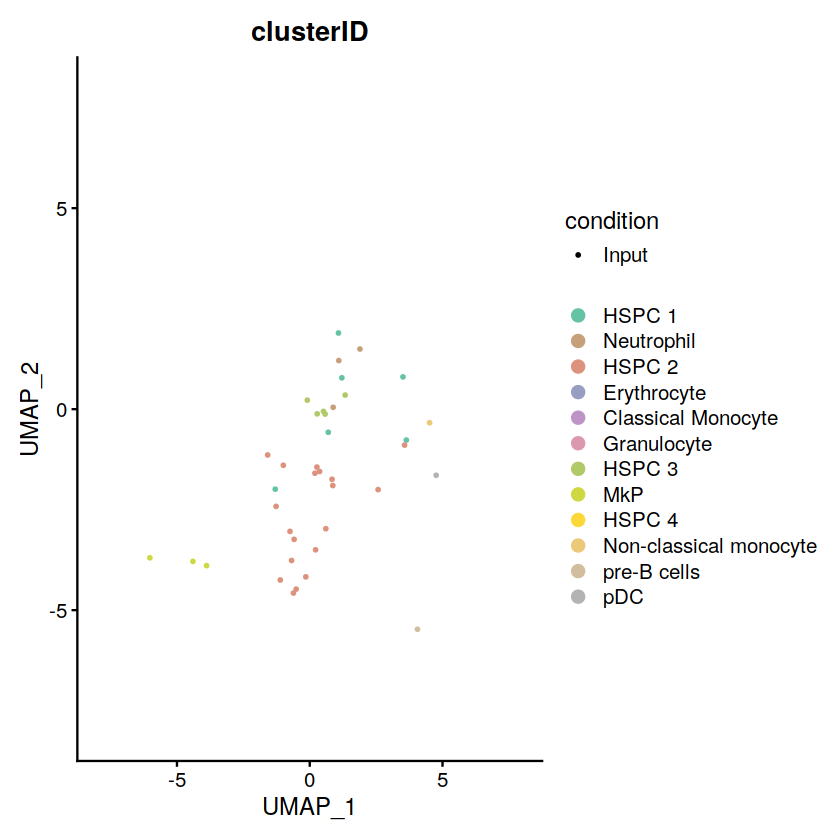

In [30]:
d

In [37]:
if( top_clones== -1){
    curr.outdir <- file.path(outdir, "umap_clones")
    dir.create(curr.outdir)
    for (cln in top.clones){
        print(cln)
        curr.se <- subset(se, subset = cloneID == cln) 
        d <- DimPlot(object = curr.se, cols=colors,
                     label = FALSE, 
                     group.by=c("clusterID"), shape.by=c("condition")) + #,  pt.size=12 ) +
            xlim(-1*coord-0.01,coord+0.01) +
            ylim(-1*coord-0.01,coord+0.01)  
            #theme(text = element_text(size = 4*top_clones)) +
            #theme(axis.text = element_text(size = (top_clones)))
        ggsave(file.path(curr.outdir, paste0("cln_", cln, "_umap_cond_col.pdf")), limitsize = FALSE)
    } 
}else{       
    d <- DimPlot(object = top.se, label = FALSE, split.by="cloneID", order = top.clones, ncol=1, 
                 combine=T, 
                 group.by=c("condition"),  pt.size=12 ) +
        xlim(-1*coord-0.01,coord+0.01) +
        ylim(-1*coord-0.01,coord+0.01) + 
        theme(text = element_text(size = 4*top_clones)) +
        theme(axis.text = element_text(size = (top_clones)))
    ggsave(file.path(outdir, "top_umap_cond_col.pdf"), width=2*top_clones, height=8*top_clones, units="in", limitsize = FALSE)

}

Warning message in dir.create(curr.outdir):
“'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top//umap_clones' already exists”


[1] "1_0"


Saving 6.67 x 6.67 in image



[1] "1_1"


Saving 6.67 x 6.67 in image



[1] "1_2"


Saving 6.67 x 6.67 in image



[1] "1_3"


Saving 6.67 x 6.67 in image



[1] "1_4"


Saving 6.67 x 6.67 in image



[1] "1_6"


Saving 6.67 x 6.67 in image



[1] "1_7"


Saving 6.67 x 6.67 in image



[1] "1_8"


Saving 6.67 x 6.67 in image



[1] "1_9"


Saving 6.67 x 6.67 in image



[1] "1_10"


Saving 6.67 x 6.67 in image



[1] "1_11"


Saving 6.67 x 6.67 in image



[1] "1_13"


Saving 6.67 x 6.67 in image



[1] "1_12"


Saving 6.67 x 6.67 in image



[1] "1_14"


Saving 6.67 x 6.67 in image



[1] "1_15"


Saving 6.67 x 6.67 in image



[1] "1_16"


Saving 6.67 x 6.67 in image



[1] "1_17"


Saving 6.67 x 6.67 in image



[1] "1_18"


Saving 6.67 x 6.67 in image



[1] "1_20"


Saving 6.67 x 6.67 in image



[1] "1_22"


Saving 6.67 x 6.67 in image



[1] "1_24"


Saving 6.67 x 6.67 in image



[1] "1_25"


Saving 6.67 x 6.67 in image



[1] "1_21"


Saving 6.67 x 6.67 in image



[1] "1_23"


Saving 6.67 x 6.67 in image



[1] "1_5"


Saving 6.67 x 6.67 in image



[1] "1_19"


Saving 6.67 x 6.67 in image



In [25]:
outdir

[1] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top/"

In [17]:
# d <- DimPlot(object = top.se, label = FALSE, split.by="cloneID", order = top.clones, ncol=1, 
#              combine=T,
#              group.by=c("condition"),  pt.size=2*(top_clones/2)) +
#     xlim(-1*coord-0.01,coord+0.01) +
#     ylim(-1*coord-0.01,coord+0.01) + 
#     theme(text = element_text(size = 8*top_clones)) +
#     theme(axis.text = element_text(size = 20))

# ggsave(file.path(outdir, "top_umap_cond_col.svg"), width=4*top_clones, height=4*top_clones*top_clones,limitsize = FALSE)
# ggsave(file.path(outdir, "top_umap_cond_col.pdf"), width=4*top_clones, height=4*top_clones*top_clones,limitsize = FALSE)



d <- DimPlot(object = top.se, label = FALSE, split.by="cloneID", order = top.clones, ncol=1, 
             combine=T, 
             group.by=c("condition"),  pt.size=12 ) +
    xlim(-1*coord-0.01,coord+0.01) +
    ylim(-1*coord-0.01,coord+0.01) + 
    theme(text = element_text(size = 4*top_clones)) +
    theme(axis.text = element_text(size = (top_clones)))

#ggsave(file.path(outdir, "top_umap_cond_col.svg"), width=2*top_clones, height=8*top_clones, device='svg', units="in", limitsize = FALSE)
ggsave(file.path(outdir, "top_umap_cond_col.pdf"), width=2*top_clones, height=8*top_clones, units="in", limitsize = FALSE)

In [18]:
outdir

[1] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top/"

In [19]:
#RidgePlot(object = se, group.by=cloneID, features = c('UMAP_1', 'UMAP_2'), sort=F)